In [17]:
#importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar

In [18]:
#reading the dataset and storing it as a dataframe
df = pd.read_excel('/content/Unemployment in India.xlsx')

In [19]:
df2 = pd.read_excel('/content/Unemployment_Rate_upto_11_2020.xlsx')

In [20]:
#displaying the dataframe
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [21]:
df2.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,Longitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [22]:
#displaying the shape
df.shape

(754, 7)

In [23]:
df2.shape

(267, 9)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   Longitude                                267 non-null    float64
 8   Latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [25]:
#754 rows, 7 columns

In [26]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [27]:
#checking for null values
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [28]:
df2.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
Longitude                                  0
Latitude                                   0
dtype: int64

In [29]:
# handling null values
# Imputation using mean


# Impute null values with the mean for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For categorical columns, you might use mode or a custom value
# Example: Impute null values with the most frequent value for 'Region'
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

# Check if null values still exist after imputation
print(df.isnull().sum())


Region                                      0
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)     0
Area                                       14
dtype: int64


In [30]:
# Filling null values with 'Unknown' for 'Date', 'Frequency', and 'Area'
df['Date'].fillna('Unknown', inplace=True)
df['Frequency'].fillna('Unknown', inplace=True)
df['Area'].fillna('Unknown', inplace=True)


In [31]:
print(df.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [32]:
#changing column names so that they dont have white-spaces, numbers or any special-characters
df.columns =['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [33]:
#displaying the updated dataframe
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [34]:
#converting the 'Frequency' column to categorical data type
df['Frequency']= df['Frequency'].astype('category')

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [36]:
#extracting the 'Month' from the Date
df['Month'] =  df['Date'].dt.month

In [37]:
missing_values = df['Month'].isna()


In [38]:
df['Month'].fillna(-1, inplace=True)


df['MonthNumber'] = df['Month'].astype(int)

# Update missing values to NaN again
df.loc[missing_values, 'MonthNumber'] = float('NaN')

In [39]:



month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# Apply the mapping to create the 'MonthName' column
df['MonthName'] = df['MonthNumber'].map(month_names)

In [40]:
#ensuring the categorical vairable
df['Region'] = df['Region'].astype('category')

In [41]:
#dropping the Month column as it in irrelevant now
#we have extracted the monthNumbers and monthNames individually
df.drop(columns='Month',inplace=True)
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,MonthNumber,MonthName
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0,Jul


## Statistics

In [42]:
combined_df = pd.concat([df, df2], ignore_index=True)

In [43]:
#5-number summary
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,MonthNumber
count,754.000000,7.540000e+02,754.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,6.390541
std,10.621164,8.012449e+06,8.035339,3.235070
min,0.000000,4.942000e+04,13.330000,1.000000
25%,4.692500,1.227446e+06,38.167500,4.000000
50%,8.625000,4.825595e+06,41.255000,6.000000
75%,15.720000,1.116545e+07,45.390000,9.000000
max,76.740000,4.577751e+07,72.570000,12.000000


In [44]:
#5-number summary of the numerical variables which give some information
round(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].describe().T,2)

#rounded to 2 decimal points and transposed to get a horizontal version

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,754.0,11.79,10.62,0.00,4.69,8.62,15.72,76.74
Estimated Employed,754.0,7204460.03,8012448.52,49420.00,1227446.25,4825595.00,11165448.50,45777509.00
Estimated Labour Participation Rate,754.0,42.63,8.04,13.33,38.17,41.26,45.39,72.57


In [45]:
#grouping by 'Region' and finding mean values for the numerical columns
regionStats = df.groupby(['Region'])[['Estimated Unemployment Rate',
                                      'Estimated Employed',
                                      'Estimated Labour Participation Rate']].mean().reset_index()

#rounding the values to 2 decimal points
round(regionStats,2)

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,Andhra Pradesh,8.91,7837548.79,40.46
1,Assam,6.43,5354772.15,44.87
2,Bihar,18.92,12366189.14,38.15
3,Chandigarh,15.99,316831.25,39.34
4,Chhattisgarh,9.24,4303498.57,42.81
5,Delhi,16.50,2627512.86,38.93
6,Goa,9.27,226308.33,39.25
7,Gujarat,6.66,11402012.79,46.10
8,Haryana,26.28,3557072.46,42.74
9,Himachal Pradesh,18.54,1059823.71,44.22


<ipython-input-46-4eb4120f363e>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatMap = heatMap.corr()


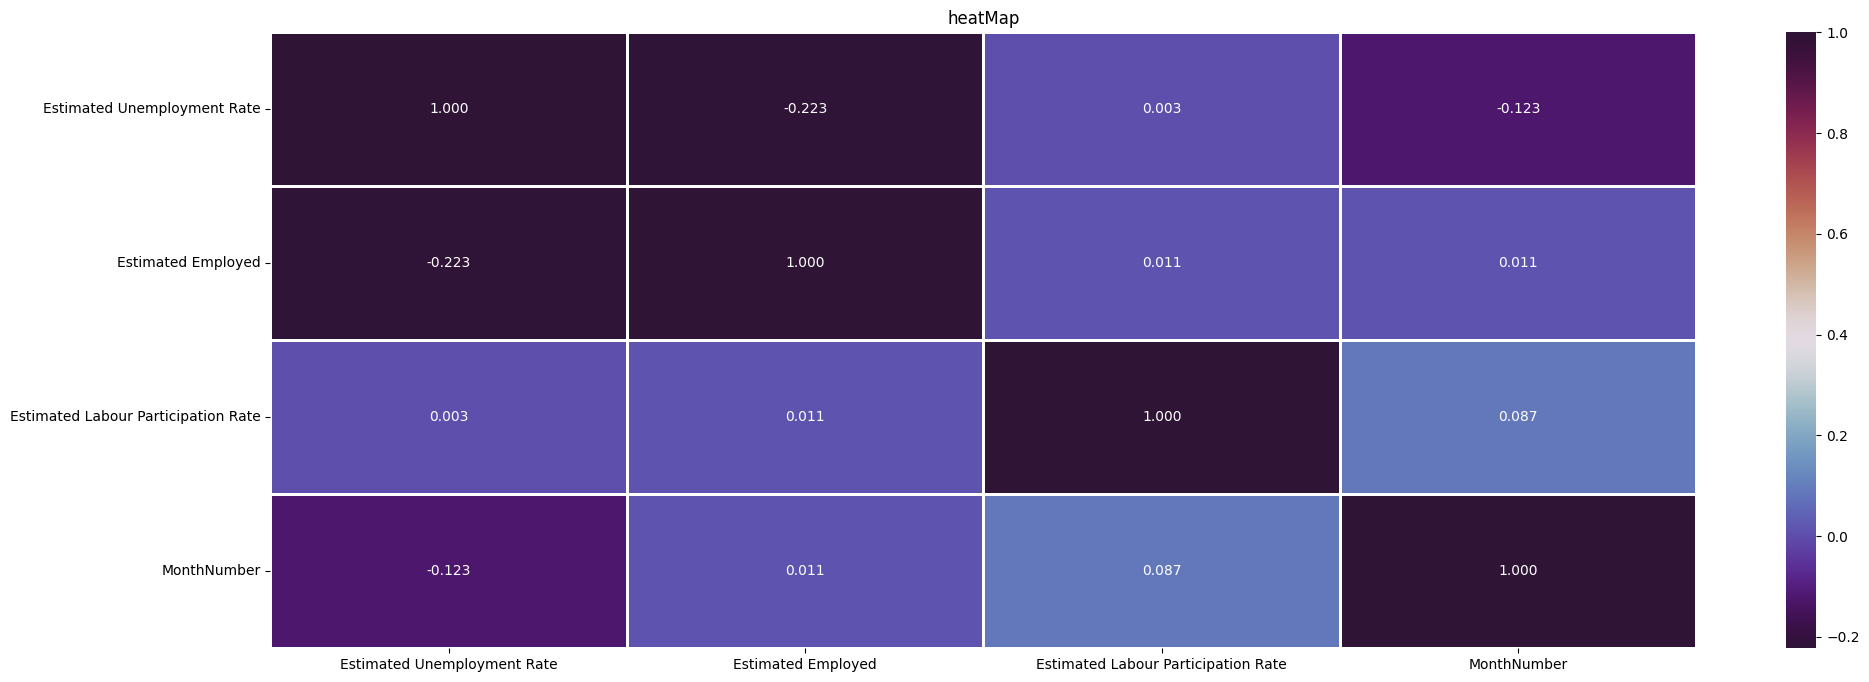

In [46]:
#constructing a 'heatMap' to find the 'pair-wise correlation' values

#dataframe of all the numerical columns
heatMap = df[['Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'MonthNumber']]

#constructing on heatMap with correlation values
heatMap = heatMap.corr()

#plotting the figure
plt.figure(figsize=(23,8))
sns.heatmap(heatMap, annot=True,cmap='twilight_shifted', fmt='.3f', linewidths=1)
plt.title('heatMap')
plt.show()

## EDA - Exploratory Data Analysis

In [47]:
#plotting a box-plot to show un-employment rate in each state
fig = px.box(
    df,
    x='Region',
    y='Estimated Unemployment Rate',
    color='Region',
    title='unemploymentRate',
    template='plotly'
)
fig.show()

In [48]:
#creating a scatter matrix plot to denote relationship
fig = px.scatter_matrix(df,
    dimensions=['Estimated Unemployment Rate','Estimated Employed',
                'Estimated Labour Participation Rate'],
    color='Region')
fig.show()

In [49]:
#plotting a "Bar-plot" to find the "average unemployment rate in each state"
newDF = df[['Estimated Unemployment Rate','Region']]

#grouping the dataframe by 'States' and finding the corresponding 'mean'
newDF = newDF.groupby('Region').mean().reset_index()

#sorting the values in the dataframe
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF,
             x='Region',
             y='Estimated Unemployment Rate',
             color='Region',
             title='Region wise  Average Employment Rate')
fig.show()

In [50]:
#plotting a "Bar-plot" to find the "unemployment rate" for each "Region" month-wise
fig = px.bar(df,
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame = 'MonthName',
             color='Region',
             title='Region-wise Unemployment Rate',
             height=800)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500

fig.show()

## Impact of Lockdown on States Estimated Employed

ValueError: Value of 'hover_name' is not the name of a column in 'data_frame'. Expected one of ['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area', 'MonthNumber', 'MonthName'] but received: States

In [60]:
#filtering dataset between month 4 and 7 (inclusive) - after lockdown
df47 = df[(df['MonthNumber'] >= 4) & (df['MonthNumber'] <=7)]

#filtering dataset between month 1 and 4 (inclusive) - before lockdown
df14 = df[(df['MonthNumber'] >= 1) & (df['MonthNumber'] <=4)]

In [63]:
#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df47g = df47.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

#grouping the dataframe on the basis of "States" and finding the corresponding mean values
df14g = df14.groupby('Region')['Estimated Unemployment Rate'].mean().reset_index()

#clubbing the 2 dataframe values
df47g['Unemployment Rate before lockdown'] = df14g['Estimated Unemployment Rate']

#renaming the column values for better understanding
df47g.columns = ['Region','unemploymentRate A/ lockdown','unemploymentRate B/ lockdown']

#displaying the top results
df47g.head()

,Region,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown
0,Andhra Pradesh,10.054167,10.756250
1,Assam,6.049091,6.750000
2,Bihar,25.370000,23.690000
3,Chandigarh,14.942500,19.366667
4,Chhattisgarh,11.659167,9.028750


In [64]:
#computing the % change in unemployment rate
df47g['% change in unemployment'] = round(df47g['unemploymentRate A/ lockdown'] - df47g['unemploymentRate B/ lockdown']/df47g['unemploymentRate B/ lockdown'],2)

In [68]:
df47g

,Region,unemploymentRate A/ lockdown,unemploymentRate B/ lockdown,% change in unemployment
0,Andhra Pradesh,10.054167,10.756250,9.05
1,Assam,6.049091,6.750000,5.05
2,Bihar,25.370000,23.690000,24.37
3,Chandigarh,14.942500,19.366667,13.94
4,Chhattisgarh,11.659167,9.028750,10.66
5,Delhi,18.141667,16.758750,17.14
6,Goa,10.596667,7.577143,9.60
7,Gujarat,8.155833,9.346250,7.16
8,Haryana,29.211667,29.186250,28.21
9,Himachal Pradesh,15.993333,15.816250,14.99
